In [115]:
from datetime import datetime, time

import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [116]:
pd.set_option('display.max_rows', 500)

In [117]:
def preprocess_frame(df):
    return df.drop(columns=['AlgorithmName', 'Respondent', 'Markers'])

def ingest_dir_as_dataframes(the_dir):
    '''
    ingests a directory of .csv files and returns them as a list of dataframes
    '''
    path = the_dir
    all_files = glob.glob(path + "/*.txt")
    the_frames = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, sep='\t')
        df = preprocess_frame(df)
        the_frames.append(df)
    return the_frames

In [118]:
frames = ingest_dir_as_dataframes('../../data/raw/Peaks/GSRPeaks/')
df = pd.concat(frames)
df.head()

/Users/trqk-data/.local/share/virtualenvs/nature-nurtures--FcyQ97q/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Amplitude,OffsetMs,OnsetMs,PeakMs,Segmentation,Stimulus,StimulusPeakSequenceNr,TotalPeakSequenceNr,Unnamed: 10,Unnamed: 11
0,0.4680,23759,18461,20575,D4S1,Forest,1,NaN,0.111429,NaN
1,0.0600,32992,30715,31495,D4S1,Forest,2,NaN,NaN,NaN
2,0.0165,38369,35438,35886,D4S1,Forest,3,NaN,NaN,NaN
3,0.1035,55676,51013,53057,D4S1,Forest,4,NaN,NaN,NaN
4,0.0210,120750,114536,115738,D4S1,Forest,5,NaN,NaN,NaN


#### Wrangling

In [119]:
df = df.replace('1 37988', '37988')

In [120]:
df['PeakMs'] = df['PeakMs'].astype(int)
df = df[df['PeakMs'] >= 0 ]

In [121]:
biomes = {}
for biome in ['Stream', 'Ocean', 'Mountain', 'Forest']:
    print(biome)
    biome_df = df[df['Stimulus'] == biome]
    biome_df = biome_df.set_index('PeakMs').sort_index()
    biomes[biome] = biome_df

Stream
Ocean
Mountain
Forest


In [122]:
biomes['Stream']

,Amplitude,OffsetMs,OnsetMs,Segmentation,Stimulus,StimulusPeakSequenceNr,TotalPeakSequenceNr,Unnamed: 10,Unnamed: 11
PeakMs,,,,,,,,,
0,0.010028,246,0,D4S1,Stream,1,NaN,0.113429,NaN
79,0.010800,1857,0,D10,Stream,1,NaN,0.181114,NaN
105,0.010500,756,0,D1D2,Stream,1,178.0,NaN,NaN
160,0.021600,1288,0,D5S2,Stream,1,NaN,0.053400,NaN
217,0.016200,1043,0,D7,Stream,1,NaN,0.248400,NaN
652,0.010500,820,548,D5S1,Stream,1,NaN,NaN,NaN
1274,0.095718,1819,1051,D5S1,Stream,1,NaN,0.033967,NaN
1427,0.046500,4050,475,D3S1,Stream,1,45.0,NaN,NaN
1497,0.108000,2686,0,D10,Stream,1,NaN,0.038215,NaN


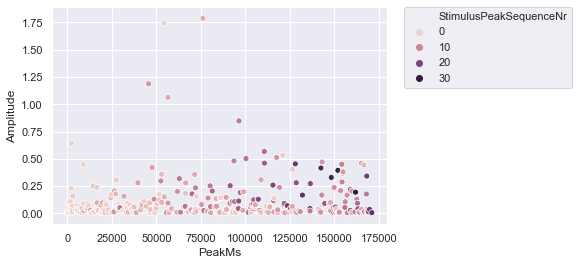

In [133]:
biome = 'Stream'
biome_df = biomes[biome]
# mask = (biome_df['Amplitude'] > 0.1) & (biome_df['Amplitude'] < .33)
# biome_df = biome_df[mask]
sns.scatterplot(x=biome_df.index, y='Amplitude', data=biome_df, hue='StimulusPeakSequenceNr')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

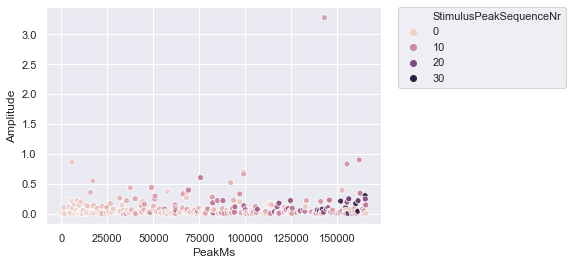

In [134]:
biome = 'Ocean'
biome_df = biomes[biome]
# mask = (biome_df['Amplitude'] > 0.1) & (biome_df['Amplitude'] < .33)
# ocean_df = biome_df[mask]
sns.scatterplot(x=biome_df.index, y='Amplitude', data=biome_df, hue='StimulusPeakSequenceNr')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

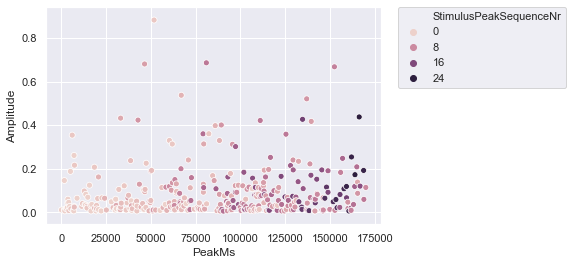

In [135]:
biome = 'Mountain'
biome_df = biomes[biome]
# mask = (biome_df['Amplitude'] > 0.1) & (biome_df['Amplitude'] < .33)
# biome_df = biome_df[mask]
sns.scatterplot(x=biome_df.index, y='Amplitude', data=biome_df, hue='StimulusPeakSequenceNr')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

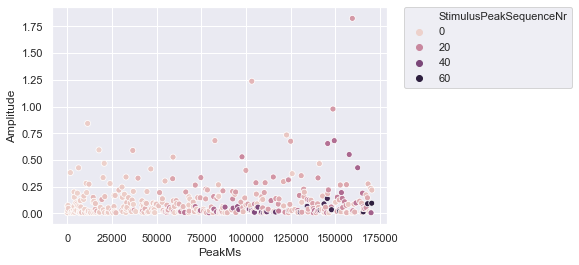

In [136]:
biome = 'Forest'
biome_df = biomes[biome]
# mask = (biome_df['Amplitude'] > 0.1) & (biome_df['Amplitude'] < .33)
# biome_df = biome_df[mask]
sns.scatterplot(x=biome_df.index, y='Amplitude', data=biome_df, hue='StimulusPeakSequenceNr')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()